## Import Libraries

In [1]:
import pandas as pd                                     # Manipulasi dan analisis data tabular
import numpy as np                                      # Operasi numerik dan manipulasi array
import seaborn as sns                                   # Visualisasi data berbasis statistik
import matplotlib.pyplot as plt                         # Membuat grafik dan plot untuk analisis data
import scipy.stats as stats                             # Fungsi statistik dan distribusi probabilitas
import time                                             # Pengukuran dan manajemen waktu dalam program

from scipy.stats import pearsonr                        # Menghitung korelasi Pearson antara dua variabel numerik

___
## Load Dataset

In [65]:
data = pd.read_csv("dataset/P2_FinPro_Final_Record.csv")

In [3]:
data

,id,gender,car,realty,child_number,income,occupation,education,marital_status,house_type,...,mobile_phone,work_phone,phone,email,family_size,months_balance,status,begin_month,credit_approval,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,0,C,-15,No,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-1,C,-15,No,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-2,C,-15,No,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-3,C,-15,No,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-4,C,-15,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-9,0,-13,No,1
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-10,2,-13,No,1
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-11,1,-13,No,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-12,0,-13,No,1


In [5]:
categorical_columns = ['gender',
                       'car',
                       'realty',
                       'occupation',
                       'education',
                       'marital_status',
                       'house_type',
                       'status',
                       'credit_approval']

for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in gender: ['M' 'F']
Unique values in car: ['Y' 'N']
Unique values in realty: ['Y' 'N']
Unique values in occupation: ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
Unique values in education: ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Unique values in marital_status: ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
Unique values in house_type: ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
Unique values in status: ['C' '1' '0' 'X' '5' '4' '3' '2']
Unique values in credit_approval: ['No' 'Yes']


In [6]:
data['target'].value_counts()

target
0    668145
1    109570
Name: count, dtype: int64

In [7]:
data['credit_approval'].value_counts()

credit_approval
Yes    668145
No     109570
Name: count, dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               777715 non-null  int64  
 1   gender           777715 non-null  object 
 2   car              777715 non-null  object 
 3   realty           777715 non-null  object 
 4   child_number     777715 non-null  int64  
 5   income           777715 non-null  float64
 6   occupation       777715 non-null  object 
 7   education        777715 non-null  object 
 8   marital_status   777715 non-null  object 
 9   house_type       777715 non-null  object 
 10  days_birth       777715 non-null  int64  
 11  days_employed    777715 non-null  int64  
 12  mobile_phone     777715 non-null  int64  
 13  work_phone       777715 non-null  int64  
 14  phone            777715 non-null  int64  
 15  email            777715 non-null  int64  
 16  family_size      777715 non-null  floa

___

## EDA 4. Employment & Occupation

### EDA 4.1 Are Applicants From Certain Occupations More Likely To Default?

Text(0, 0.5, 'Count')

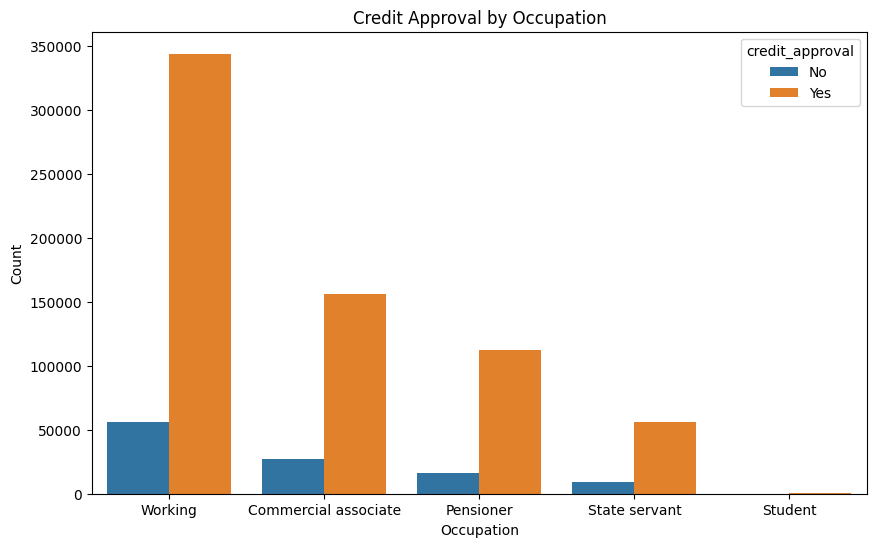

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='occupation', hue='credit_approval')
plt.title('Credit Approval by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')

Insight:

.................

___
### EDA 4.2 Is There a Relationship Between 'years_employed' and 'income' or 'target'?

In [22]:
# Konversi days_employed ke years_employed
data['years_employed'] = -(data['days_employed'] / 365)

# Pastikan credit_approval sudah jadi numerik
data['credit_approval'] = data['credit_approval'].map({'Yes': 1, 'No': 0})

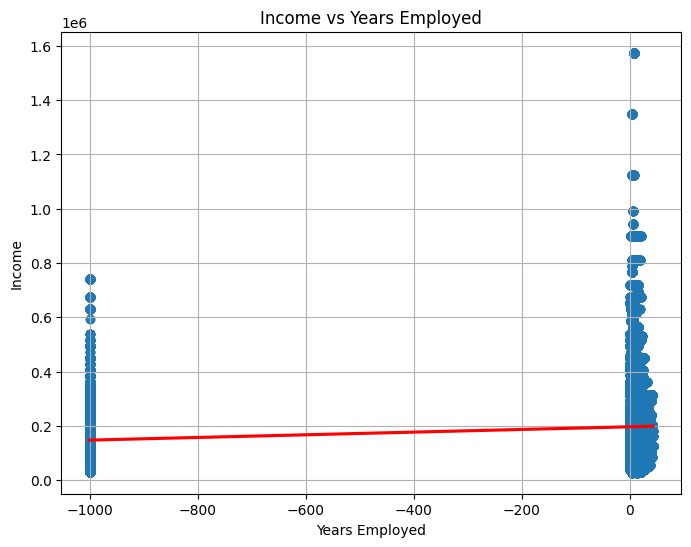

In [23]:
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x='years_employed', y='income', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Income vs Years Employed')
plt.xlabel('Years Employed')
plt.ylabel('Income')
plt.grid(True)

Insight:

No relationship.

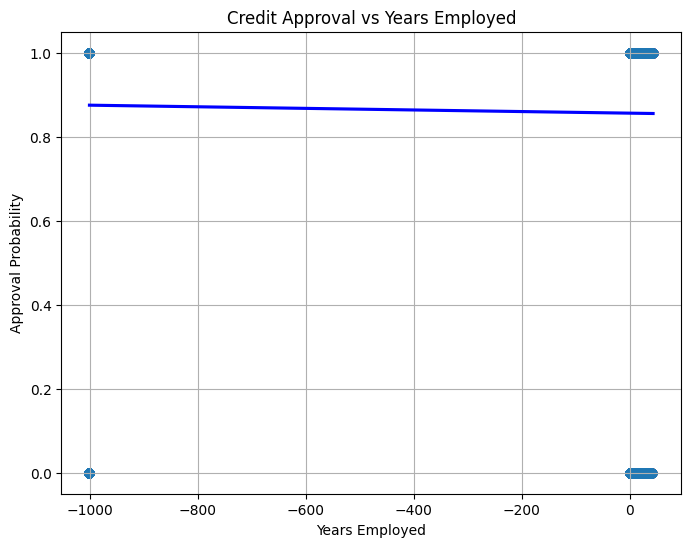

In [24]:
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x='years_employed', y='credit_approval', logistic=False, scatter_kws={'alpha':0.4}, line_kws={'color':'blue'})
plt.title('Credit Approval vs Years Employed')
plt.xlabel('Years Employed')
plt.ylabel('Approval Probability')
plt.grid(True)

Insight:

No relationship.

___
## EDA 5. Contactability & Data Completeness

### EDA 5.1 How Many Customers Provide a Mobile Phone, Work Phone, or Email?

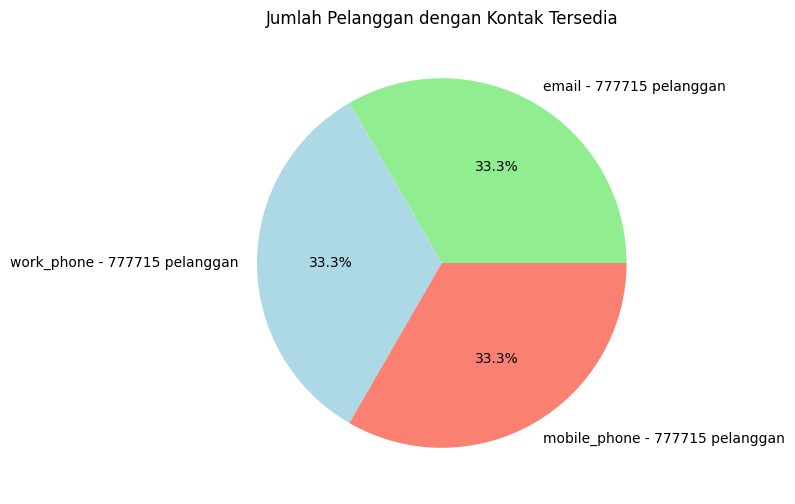

In [28]:
contact_cols = ['email', 'work_phone', 'mobile_phone']
data[contact_cols] = data[contact_cols].notnull().astype(int)  # asumsikan null = tidak tersedia
contact_counts = data[contact_cols].sum()

# Buat label lengkap dengan jumlah
labels = [f"{idx} - {int(val)} pelanggan" for idx, val in contact_counts.items()]

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(contact_counts, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'salmon'])
plt.title('Jumlah Pelanggan dengan Kontak Tersedia')
plt.show()

Insight:

....

___
## EDA 6. Financial Behavior & Transaction History

### EDA 6.1 What is the distribution of months_balance (if it refers to account history)?

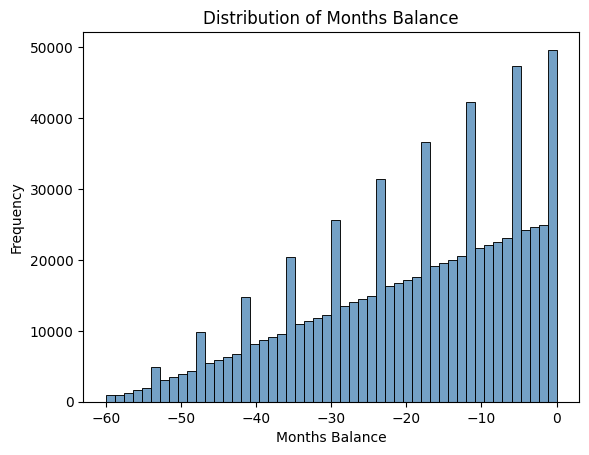

In [35]:
sns.histplot(data=data, x='months_balance', bins=50, color='steelblue')
plt.title('Distribution of Months Balance')
plt.xlabel('Months Balance')
plt.ylabel('Frequency')
plt.show()

Insight:

.......

___
### EDA 6.2 Does begin_month provide insight into credit recency or tenure? / Does begin_months have an impact for credit_approval

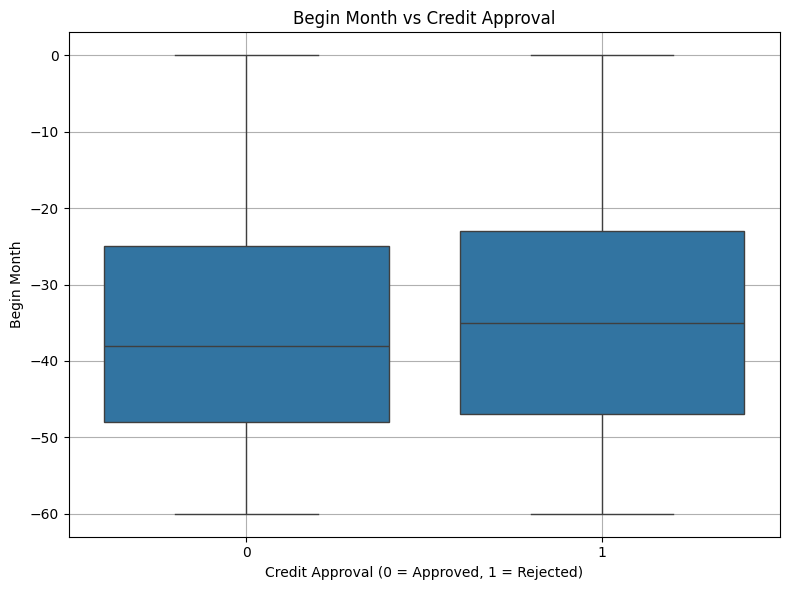

In [45]:
# Buat salinan lokal credit_approval agar tidak mengubah data aslinya
mapped_approval = data['credit_approval'].map({'Yes': 1, 'No': 0})

# Plot boxplot menggunakan mapped_approval
plt.figure(figsize=(8, 6))
sns.boxplot(x=mapped_approval, y=data['begin_month'])
plt.title('Begin Month vs Credit Approval')
plt.xlabel('Credit Approval (0 = Approved, 1 = Rejected)')
plt.ylabel('Begin Month')
plt.grid(True)
plt.tight_layout()
plt.show()


Insight:

No relationship / impact.

___
## EDA 6.3 Do longer account histories correlate with approval or reduced risk?

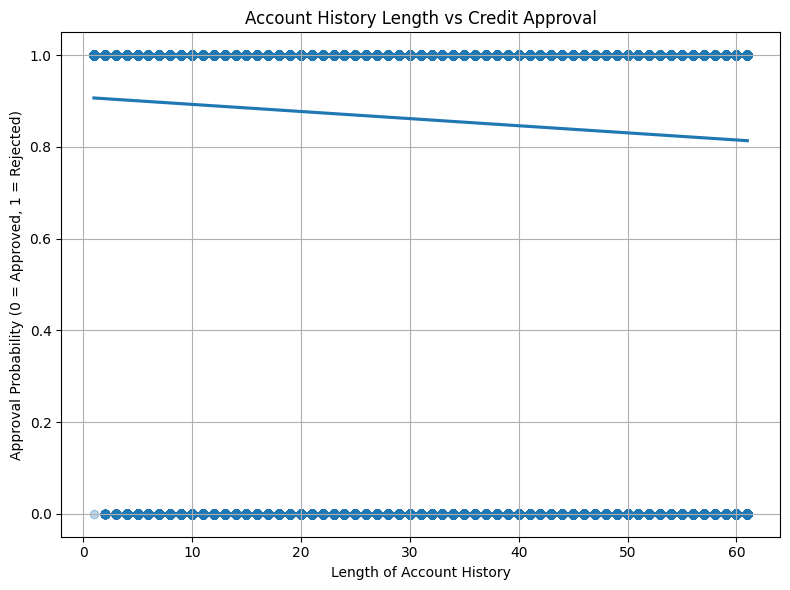

In [49]:
account_length = data.groupby('id')['months_balance'].count().reset_index()
account_length.columns = ['id', 'account_history_length']

# Mapping credit_approval to numeric without changing original data
approval_mapped = data[['id', 'credit_approval']].copy()
approval_mapped['credit_approval'] = approval_mapped['credit_approval'].map({'Yes': 1, 'No': 0})

# Merge account length with mapped approval
merged = account_length.merge(approval_mapped, on='id')

# Plot regplot
plt.figure(figsize=(8, 6))
sns.regplot(data=merged, x='account_history_length', y='credit_approval', scatter_kws={'alpha':0.3})
plt.title('Account History Length vs Credit Approval')
plt.xlabel('Length of Account History')
plt.ylabel('Approval Probability (0 = Approved, 1 = Rejected)')
plt.grid(True)
plt.tight_layout()
plt.show()


Insight:

No relationship.

___
## EDA 7. Anomalies & Outliers

### EDA 7.1

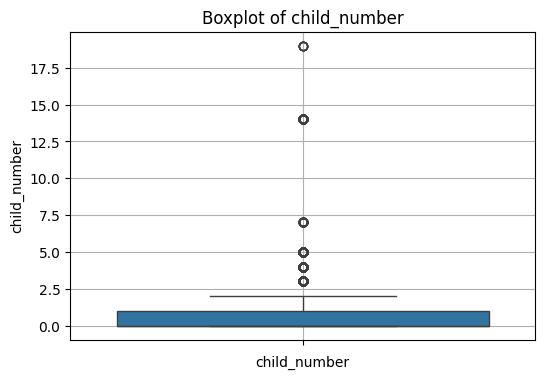

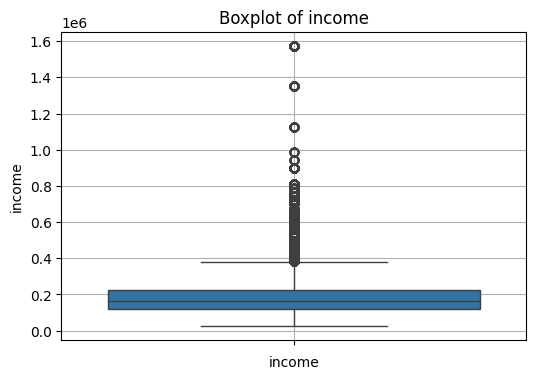

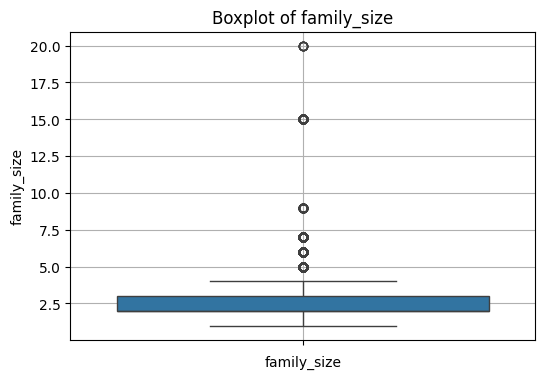

In [53]:
features = ['child_number', 'income', 'family_size']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.grid(True)
    plt.show()


Insight:

.......

___
### EDA 7.2 Do extreme income values skew the distribution? Should they be capped or log-transformed?

In [60]:
from scipy.stats import skew

income_skew = skew(data['income'].dropna())
print(f"Skewness of income: {income_skew:.4f}")

Skewness of income: 2.5776


Yes, it's very skewed, but we’re not applying any data capping because those values represent the customers themselves.

___
## EDA 8. Relationships Between Variables

### EDA 8.1 Which variables are most strongly correlated with the target or credit approval?

In [67]:
data

,id,gender,car,realty,child_number,income,occupation,education,marital_status,house_type,...,mobile_phone,work_phone,phone,email,family_size,months_balance,status,begin_month,credit_approval,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,0,C,-15,No,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-1,C,-15,No,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-2,C,-15,No,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-3,C,-15,No,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-4,C,-15,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-9,0,-13,No,1
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-10,2,-13,No,1
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-11,1,-13,No,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-12,0,-13,No,1


In [68]:
from scipy.stats import spearmanr

# Pisahkan kolom numerik
numeric_cols = data.select_dtypes(include='number')

# Mapping target secara lokal
target = data['credit_approval'].map({'Yes': 1, 'No': 0})

# Hitung spearman correlation dan p-value
spearman_results = []

for col in numeric_cols:
    corr, pval = spearmanr(data[col], target, nan_policy='omit')
    spearman_results.append((col, corr, pval))

# Simpan ke DataFrame
spearman_df = pd.DataFrame(spearman_results, columns=['Feature', 'Spearman Correlation', 'p-value'])
spearman_df = spearman_df.sort_values(by='Spearman Correlation', ascending=False)
print(spearman_df)

C:\Users\Yonathan Anggraiwan\AppData\Local\Temp\ipykernel_11340\2090470277.py:13: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = spearmanr(data[col], target, nan_policy='omit')


           Feature  Spearman Correlation        p-value
11     begin_month              0.046932   0.000000e+00
10  months_balance              0.018263   2.286963e-58
7            phone              0.008894   4.391256e-15
6       work_phone              0.001237   2.752842e-01
4    days_employed              0.000230   8.389664e-01
9      family_size             -0.006159   5.578557e-08
8            email             -0.011388   9.817997e-24
0               id             -0.011854   1.400169e-25
2           income             -0.015275   2.297872e-41
1     child_number             -0.016658   7.323117e-49
3       days_birth             -0.032482  1.470893e-180
12          target             -1.000000   0.000000e+00
5     mobile_phone                   NaN            NaN


In [90]:
from scipy.stats import chi2_contingency

def cramers_v(col1, col2):
    contingency = pd.crosstab(col1, col2)
    chi2 = chi2_contingency(contingency)[0]
    n = contingency.sum().sum()
    r, k = contingency.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Pilih semua kolom kategorikal, kecuali target
categorical_cols = data.select_dtypes(include='object').columns.drop('credit_approval')
cramers_results = []

for col in categorical_cols:
    try:
        score = cramers_v(data[col], data['credit_approval'])
        cramers_results.append((col, round(score, 3)))
    except:
        pass  # lewatkan jika kolom tidak bisa diolah

# Tampilkan hasil
cramers_df = pd.DataFrame(cramers_results, columns=['Feature', "Cramér's V"])
cramers_df = cramers_df.sort_values(by="Cramér's V", ascending=False)
print(cramers_df)

          Feature  Cramér's V
7          status       0.321
2          realty       0.031
4       education       0.027
5  marital_status       0.024
0          gender       0.022
3      occupation       0.021
6      house_type       0.017
1             car       0.012


Insight:

.....

___
### EDA 8.2 Is there multicollinearity that could affect model reliability later on?

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Pilih hanya fitur numerik untuk VIF
numerical_features = data.select_dtypes(include=['float64', 'int64']).drop(columns=['target'])
X = add_constant(numerical_features)  # Tambahkan intercept

vif_scores = pd.DataFrame()
vif_scores['Feature'] = X.columns
vif_scores['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_scores.sort_values(by='VIF', ascending=False))

           Feature           VIF
5     mobile_phone  15026.822470
1     child_number      5.029649
9      family_size      4.924435
3       days_birth      1.759963
4    days_employed      1.697911
11     begin_month      1.650425
10  months_balance      1.641183
6       work_phone      1.208879
7            phone      1.120839
2           income      1.047278
8            email      1.024853
0               id      1.012373


Insight:

Yes, very affect the model.
___